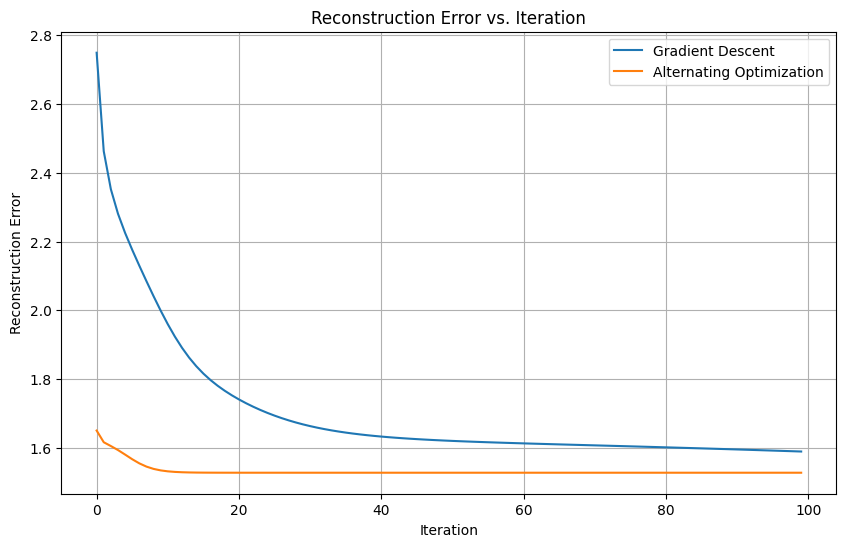

In [ ]:
# CS771 (Autumn 2023)
# Solving matrix factorization A = UV^\top using alternating optimization. A is given, U and V are unknowns
# Loss function is argmin_{U,V} ||A-UV^\top||^2
# Solving for each row of U (resp V) while keeping V (resp U) and the other rows of U (resp V) fixed,
# the problem has a closed-form solution. Thus alternating optimization is natural for this problem
# For a comparison, gradient descent is also shown

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for matrix factorization
np.random.seed(42)
M = 10  # Number of rows
N = 8   # Number of columns
K = 3   # Rank of factor matrices

# Generate a random matrix to be factorized
A = np.random.rand(M, N)

# Initialize factor matrices for both methods
U_grad_descent = np.random.rand(M, K)
V_grad_descent = np.random.rand(N, K)

U_alternating = np.random.rand(M, K)
V_alternating = np.random.rand(N, K)

# Number of iterations for both methods
num_iterations = 100
learning_rate = 0.1  # our alt-opt methos doesn't need learning rate

# Lists to store reconstruction errors at each iteration
reconstruction_errors_grad_descent = []
reconstruction_errors_alternating = []

# Gradient Descent for Matrix Factorization
for iteration in range(num_iterations):
    # Compute the gradient for U and update U using gradient descent
    gradient_U = (U_grad_descent.dot(V_grad_descent.T) - A).dot(V_grad_descent)
    U_grad_descent -= learning_rate * gradient_U

    # Compute the gradient for V and update V using gradient descent
    gradient_V = (U_grad_descent.dot(V_grad_descent.T) - A).T.dot(U_grad_descent)
    V_grad_descent -= learning_rate * gradient_V

    # Calculate the reconstruction error for gradient descent
    reconstruction_error_grad_descent = np.linalg.norm(A - U_grad_descent.dot(V_grad_descent.T))
    reconstruction_errors_grad_descent.append(reconstruction_error_grad_descent)

# Alternating Optimization for Matrix Factorization
for iteration in range(num_iterations):
    # Fix U and optimize V for alternating optimization
    # Solving for each row of V is a least squares problem
    for i in range(N):
        V_alternating[i, :] = np.linalg.lstsq(U_alternating, A[:, i], rcond=None)[0]

    # Fix V and optimize U for alternating optimization
    # Solving for each row of U is a least squares problem
    for j in range(M):
        U_alternating[j, :] = np.linalg.lstsq(V_alternating, A[j, :], rcond=None)[0]

    # Calculate the reconstruction error for alternating optimization
    reconstruction_error_alternating = np.linalg.norm(A - U_alternating.dot(V_alternating.T))
    reconstruction_errors_alternating.append(reconstruction_error_alternating)

# Plot the reconstruction errors for both methods
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), reconstruction_errors_grad_descent, label='Gradient Descent')
plt.plot(range(num_iterations), reconstruction_errors_alternating, label='Alternating Optimization')
plt.xlabel('Iteration')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()
